In [222]:
seznam3=[];
for G in graphs.nauty_geng('3 -c'):
    seznam3.append(G)


In [223]:
seznam4=[];
for G in graphs.nauty_geng('4 -c'):
    seznam4.append(G)


In [224]:
seznam5=[];
for G in graphs.nauty_geng('5 -c'):
    seznam5.append(G)
    

In [225]:
seznam6=[];
for G in graphs.nauty_geng('6 -c'):
    seznam6.append(G)


In [226]:
seznam7=[];
for G in graphs.nauty_geng('7 -c'):
    seznam7.append(G)

In [227]:
seznam8=[];
for G in graphs.nauty_geng('8 -c'):
    seznam8.append(G)


In [228]:
def dominacijsko(G):
    t = G.dominating_set(value_only= True)
    return t

In [229]:
def nepadajoc_seznam(G):
    D = G.degree_sequence()
    D.reverse()
    return D


In [230]:
def stevilo_povezav(G):
    stevilo = G.edges()
    return len(stevilo)

In [231]:
def anihilacijsko_stevilo(G):
    D = nepadajoc_seznam(G)
    m = stevilo_povezav(G)
    a = 0
    v = 0
    i = 0
    while v <= m:
        if v + D[i] <= m:
            a = a + 1
            v = v + D[i]
            i = i + 1
        else:
            v = v + D[i]
    return a

In [232]:
def neenakost(G):
    gama = dominacijsko(G)
    a = anihilacijsko_stevilo(G)
    return a + 1 - gama >= 0

In [233]:
def preveri_male_grafe(seznam_grafov):
    for i in seznam_grafov:
        if neenakost(i) == False:
            return False
    return True


In [245]:
from sage.graphs.connectivity import is_connected
def spremeni_graf(G):
    H = Graph(G)
    if random() < 0.75:
        i = 0
        while True:
            H.delete_edge(H.random_edge())
            if is_connected(H):
                H
                break
            else:
                H = Graph(G)
                i = i + 1
                True
            if i > 25: #Št. poskusov odstranitve
                H.add_edge(H.complement().random_edge()) #Grafu H doda random povezavo, ki je še ni v grafu (izbira povezave iz komplementa grafa H)
                break
    else: 
        if H.complement().size() == 0: #Če je število povezav v komplementu == 0
            H.delete_edge(H.random_edge()) # Grafu H zbriše random povezavo
        else:
            H.add_edge(H.complement().random_edge()) # Graf H doda povezavo, ki je še ni v grafu (izbira med povezavami v komplementu)
    return H


In [235]:
#Generiran random graf G

In [236]:
def razlika(G):
    gama = dominacijsko(G)
    a = anihilacijsko_stevilo(G)
    return a + 1 - gama 

In [237]:
def najmanjse_razlike(G):
    stevilo_korakov = 1000
    trenutna_razlika = min_razlike = razlika(G)
    seznam_grafov_min = [G]
    for p in range(0, stevilo_korakov):
        T = stevilo_korakov / (p+1)
        nov_graf = spremeni_graf(G)
        nova_razlika = razlika(nov_graf)
        if nova_razlika < min_razlike:
            min_razlike = nova_razlika
            seznam_grafov_min = []
            seznam_grafov_min.append(nov_graf)
        elif nova_razlika == min_razlike:
            if all(not H.is_isomorphic(nov_graf) for H in seznam_grafov_min): # Grafi naj se ne ponavljajo v seznamu
                seznam_grafov_min.append(nov_graf)
        if nova_razlika < trenutna_razlika or exp(-1 * (nova_razlika - trenutna_razlika) / T) >= random():
            G = nov_graf
            trenutna_razlika = nova_razlika

    return (min_razlike, seznam_grafov_min)

In [238]:
def najvecje_razlike(G):
    stevilo_korakov = 1000
    trenutna_razlika = max_razlike = razlika(G)
    seznam_grafov_max = [G]
    for p in range(0, stevilo_korakov):
        T = stevilo_korakov / ( p + 1 )
        nov_graf = spremeni_graf(G)
        nova_razlika = razlika(nov_graf)
        if nova_razlika > max_razlike:
            max_razlike = nova_razlika
            seznam_grafov_max = []
            seznam_grafov_max.append(nov_graf)
        elif nova_razlika == max_razlike:
             if all(not H.is_isomorphic(nov_graf) for H in seznam_grafov_max):
                seznam_grafov_max.append(nov_graf)
        if nova_razlika > trenutna_razlika or exp(-1 * (trenutna_razlika - nova_razlika) / T) >= random():
            G = nov_graf
            trenutna_razlika = nova_razlika
        G = nov_graf

    return (max_razlike, seznam_grafov_max)

In [239]:
def nakljucni_graf(st_vozlisc, st_povezav):
    graf = graphs.RandomGNM(st_vozlisc, st_povezav)
    while graf.is_connected() == False:
        graf = graphs.RandomGNM(st_vozlisc, st_povezav)
    nakljucni = graf
    nakljucni.show()
    return nakljucni

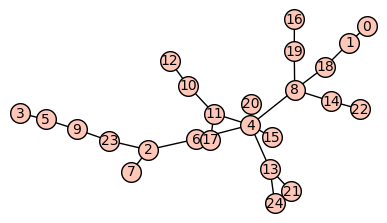

6


In [270]:
raz, L = najmanjse_razlike(nakljucni_graf(25,25))
print(raz)
#for G in L:
    #G.show()

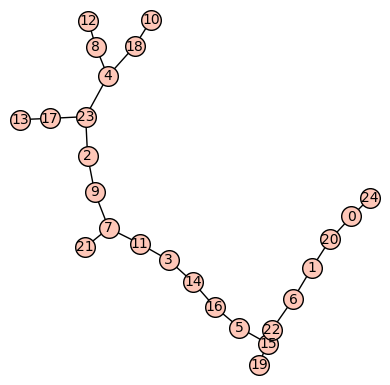

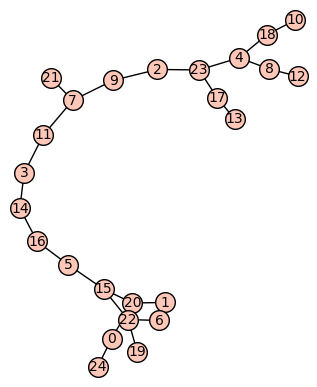

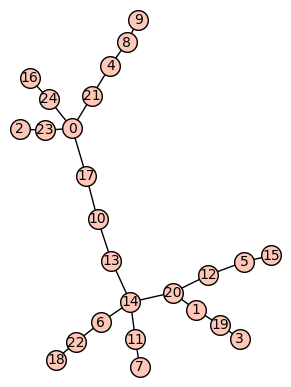

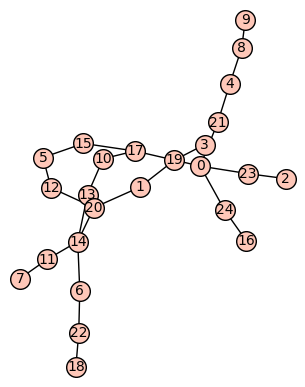

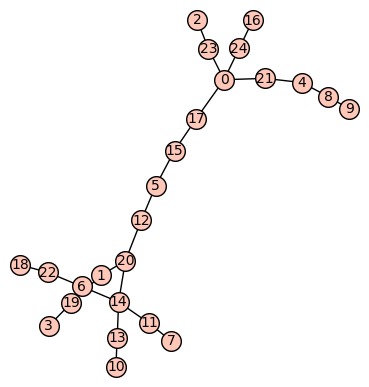

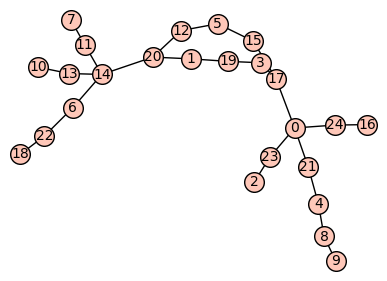

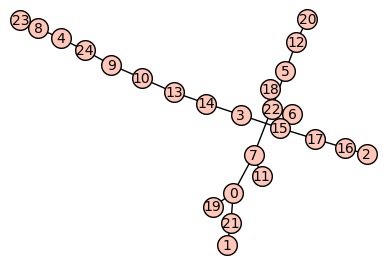

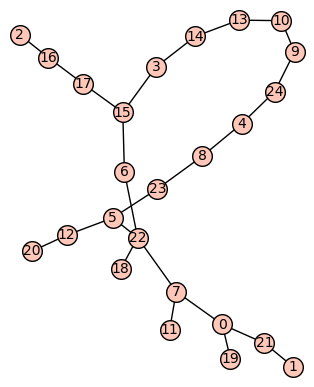

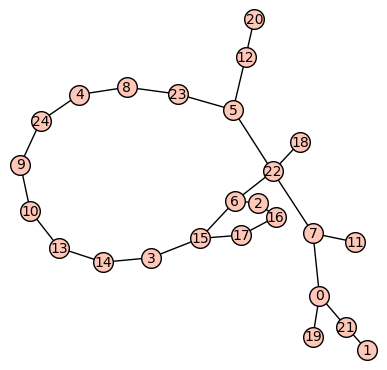

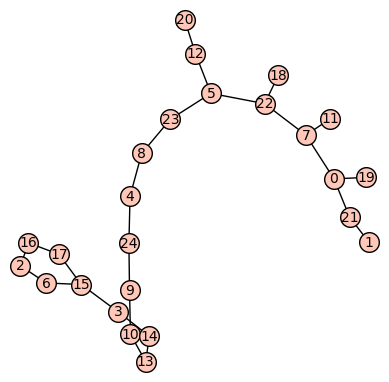

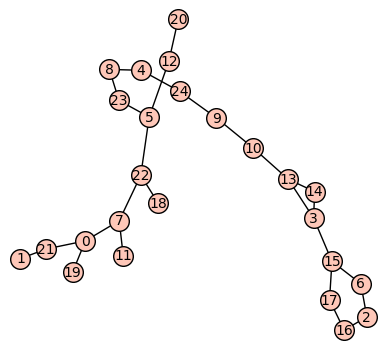

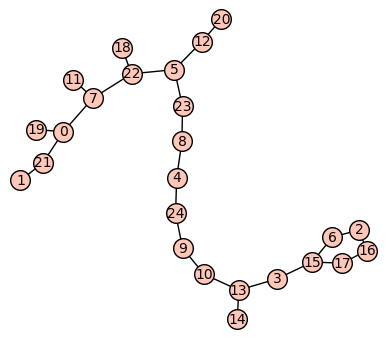

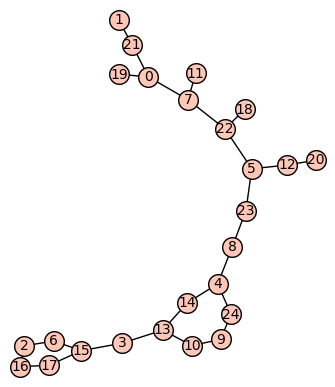

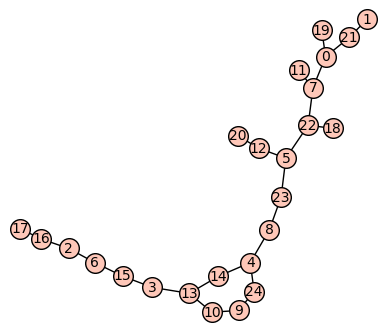

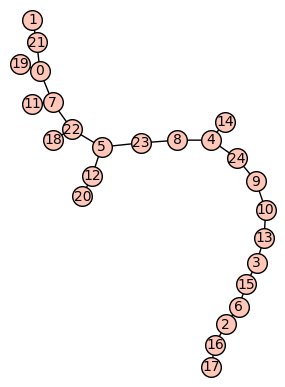

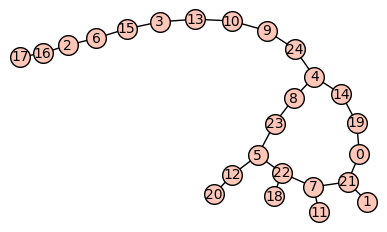

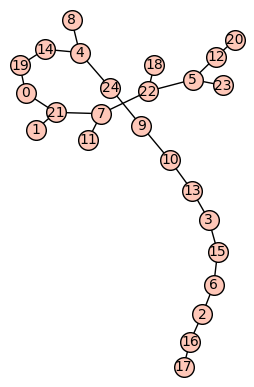

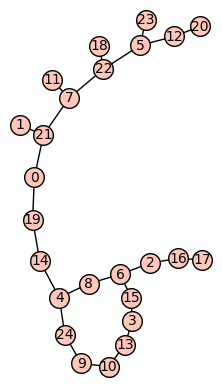

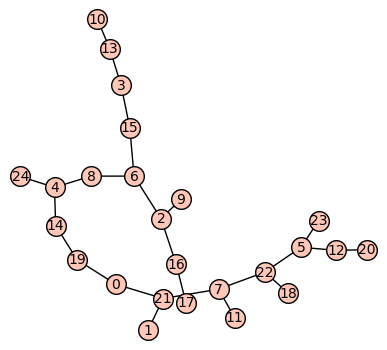

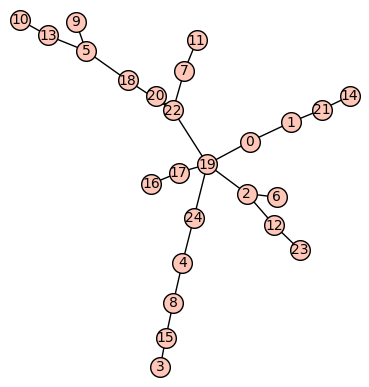

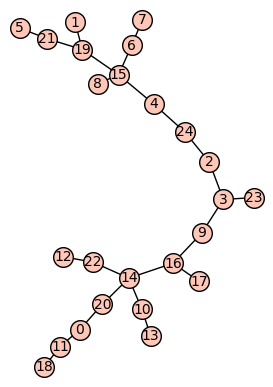

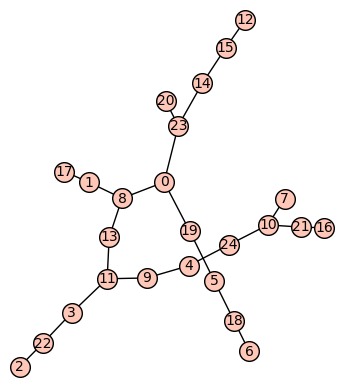

In [266]:
for G in L:
    G.show()

In [262]:
min([G.size() for G in L])

24

In [261]:
max([G.size() for G in L])

26

In [0]:
[G.size() for G in L]

In [260]:
len(L)

22

In [0]:
def ravninski():
    true = 0
    false = 0
    for el in [G.is_planar() for G in L]:
        if el == True:
            true = true + 1
        else:
            false = false + 1
    return (true, false)

In [0]:
def drevo():
    true = 0
    false = 0
    for el in [G.is_tree() for G in L]:
        if el == True:
            true = true + 1
        else:
            false = false + 1
    return (true, false)

In [0]:
def kaktus():
    true = 0
    false = 0
    for el in [G.is_cactus() for G in L]:
        if el == True:
            true = true + 1
        else:
            false = false + 1
    return (true, false)

In [263]:
ravninski()

(22, 0)

In [264]:
drevo()

(10, 12)

In [265]:
kaktus()

(21, 1)